# Multilayer neural networks & PyTorch

[Neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are a class of machine learning models that are inspired by the structure and function of biological neural networks. They can learn complex functions from large amounts of data. We will start our journey of neural networks with something familiar, the [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), which can be viewed as a neural network in probably the simplest form. We will then introduce single-layer and multilayer neural networks as well as the [PyTorch](https://pytorch.org/) software  library for building neural networks.

Watch the 16-minute video below for a visual explanation of neural networks.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/CqOfi41LfDw?start=125&end=1090" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Explaining main ideas behind neural networks, by StatQuest](https://www.youtube.com/embed/CqOfi41LfDw?start=125&end=1090)
```

## Logistic regression as a neural network

Let us consider a simple neural network to classify data points, using the logistic regression model as an example:

* Each data point has one feature/variable, so we need one input node on the input layer.
* We are not going to use any hidden layer, for simplicity.
* We have two possible output classes so the output of the network will be a single value between 0 and 1, which is the estimated probability $\pi$ for a data point to belong to class 1. Then, the probability to belong to class 0 is simply $1-\pi$. Therefore, we have one single output neuron, the only neuron in the network.

If we use the [logistic (sigmoid) function](https://en.wikipedia.org/wiki/Logistic_function) as the [activation function](https://en.wikipedia.org/wiki/Activation_function) in the output neuron, this neuron will generate a value between 0 and 1, which can be used as a classification probability.

We can represent this simple network visually in the following figure:

```{figure} https://github.com/cbernet/maldives/raw/master/images/one_neuron.png
---
height: 250px
name: one_neuron
---
Neural network with one input node and one neuron, with no hidden layer. The neuron first computes the weighted input $z = wx + b$, where $w$ is the weight and $b$ is the bias, and then uses the sigmoid function $\sigma (z) = 1/(1+e^{-z})$ as the activation function to compute the output of the neuron.
```

In the output neuron: 

* The first box performs a change of variable and computes the **weighted input** $z$ of the neuron, $z = wx + b$, where $w$ is the weight and $b$ is the bias.
* The second box applies the **activation function**, the sigmoid $\sigma (z) = 1/(1+e^{-z})$, to the weighted input $z$.
* The output of the neuron is the value of the sigmoid function, which is a value between 0 and 1.

This simple network has only two parameters, the weight $w$ and the bias $b$, both used in the first box. We see in particular that when the bias $b$ is very large, the neuron will **always be activated/fired**, whatever the input. On the contrary, for very negative biases, the neuron is **dead**. 

We can write the output simply as a function of $x$, 

$$f(x) = \sigma(z) = \sigma(wx+b).$$

This is exactly the **logistic regression** classifier. Thus, the logistic regression model can be viewed as a simple neural network with a single neuron. The neuron is a linear function of the input feature(s), and the sigmoid function is the activation function. Indeed, the logistic regression model and its multi-class extension, the softmax regression model, are standard units in neural networks. 

## Shallow vs deep learning

Shallow learning models learn their parameters directly from the features of the data {cite}`burkov2019hundred`. Most models that we studied in the previous chapters are shallow learning models, such as linear regression, logistic regression, or support vector machines. They are called shallow because they are composed of a single _layer_ of learning units, or a single learning unit. We see a shallow learning model with a single neuron in {numref}`one_neuron`.

Deep learning models are neural networks with multiple (typically more than two) hidden layers. The parameters for such deep learning models are not learned directly from the features of the data. Instead, the features are used to compute the input of the first hidden layer, which is then used to compute the input of the second hidden layer, and so on. The output of the last hidden layer is used as the input of the output layer. The output layer is typically a single neuron with a sigmoid activation function, which can be used to compute a classification probability.

## Single-layer neural networks

{numref}`single_layer_nn` shows a single-layer neural network with two ($D=2$) input nodes/units (features), one hidden layer with four ($K=4$) neurons as the hidden nodes/units (latent features), and one output node/unit (target/label). The input layer is the layer that receives the input data. The hidden layer is the layer that computes the weighted input of the output layer, which can be considered as latent features. The output layer is the layer that computes the output of the network from the weighted input provided by the hidden layer.

```{figure} https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg
---
height: 300px
name: single_layer_nn
---
A simple neural network with a single hidden layer. The hidden layer computes activations $a_1, \cdots, a_K$ ($K=4$ here) that are nonlinear transformations of linear combinations of the input features $x_1, \cdots, x_D$ ($D=2$ here). The output layer computes the output $\hat{y}$ from the activations $a_1, \ldots, a_K$ in a similar way.
```

As illustrated in {numref}`one_neuron`, the $k$th neuron in the hidden layer computes the weighted input $z_k$ from the input data $\mathbf{x}$ using the weights $\mathbf{w}_k$ and bias $b_k$, and applies the activation function $g(z)$ to the weighted input $z_k$ to compute the output of the neuron as follows:

$$a_k=h_k(z_k)=g\left(w_{k0}+\sum_{d=1}^Dw_{kd}x_d\right).$$ 

The output of the hidden layer is the vector of the outputs of the $K$ neurons in the hidden layer. The output of the network is the output of the output layer, which is computed from the output of the hidden layer, $a_1, \cdots, a_K$, in a similar way as the output of a hidden neuron is computed from the input features.

### System transparency

This simple neural network derives four new features from the original two features by computing four differently weighted sums of the original two features and then squashing the weighted sums with an activation function for the hidden layer. It then uses these four new features to compute the output of the network by computing their weighted sum and then squashing the weighted sum with another activation function for the output layer. As mentioned in the overview, neural networks are semi-transparent systems where we can see the transformation of the input to the output, but it is difficult or too complicated to invert the transformation to obtain the input from the output.

```{admonition} System transparency
:class: important

- For any data point $ \mathbf{x} $, we can transform it through the hidden layer to obtain four latent features $ [a_1 \;\; a_2 \;\; a_3 \;\; a_4]^{\top} $, and then transform these latent features through the output layer to obtain the output $\hat{y}$. 

- Due the the presence of the hidden layer, it is difficult and complicated to invert the transformation from the input to the output for even single-layer neural networks. 
```


### Activation functions

The activation function $g(z)$ is a function that maps the weighted input $z_k$ to the output of the neuron. It is typically a **_nonlinear_** function. Early neural networks often use the sigmoid function or the hyperbolic tangent function $\tanh(\cdot)$ as the activation function. In modern neural networks, the ReLU function is often used as the activation function:

$$g(z)=\mathtt{ReLU}(z)=\begin{cases}z & \text{if } z>0\\0 & \text{otherwise.}\end{cases}$$

The ReLU function is not differentiable at $z=0$, but it is computationally more efficient than the sigmoid function and the hyperbolic tangent function.

There are many other activation functions, such as the Gaussian Error Linear Unit (GELU). You can refer to the [Table of activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) in Wikipedia for a list of activation functions. The following figure shows the ReLU and GELU functions.

```{figure} https://upload.wikimedia.org/wikipedia/commons/4/42/ReLU_and_GELU.svg
---
height: 300px
name: activation_functions
---
Activation functions: ReLU (left) and GELU (right).
```

The _nonlinearity_ of the activation function is important for neural networks. Without the nonlinearity, i.e., if all the activation functions of a neural network are linear, this neural network will be equivalent to a simple linear model, no matter how many hidden layers it has (since composition of linear functions is linear). The nonlinearity allows the neural network to learn more complex functions. On the other hand, the nonlinearity also makes the neural network more difficult to train (needs more data), more prone to overfitting, and more difficult to interpret.

## Multilayer neural networks

The single-layer neural network in {numref}`single_layer_nn` is a special case of a multilayer neural network. It is easier to make conceptual connections between single-layer neural networks and our previous shallow learning models. In the following sections, we will study multilayer neural networks, which have more than one hidden layer and are more powerful than single-layer neural networks. In theory, a single-layer neural network with a large number of hidden units can approximate any function. However, the learning task of discovering a good set of weights for a single-layer neural network is more difficult than that of discovering a good set of weights for a multilayer neural network. 

In a multilayer neural network, the input layer is the layer that receives the input features. The hidden layers are the layers that compute the weighted input of the output layer in multiple steps, with each step computing the weighted input of the next layer similar to the above in a single-layer neural network. Therefore, there are multiple levels of transformations of the input features and these multiple levels of latent features represent multiple levels of abstraction of the input features. The output layer is the layer that computes the output of the network from the weighted input provided by the last hidden layer. 

All modern neural networks are multilayer neural networks, although with various architectures. The popularity of neural networks and deep learning is accelerated by the availability of large datasets, the development of efficient training algorithms and hardware for training and inference. Moreover, the availability of open-source software libraries for neural networks and deep learning has made it easier for researchers and practitioners to use these advanced tools in their applications. PyTorch is one of such open-source software libraries.

## PyTorch basics

[PyTorch](https://en.wikipedia.org/wiki/PyTorch) is an open-source software library for machine learning and particularly deep learning. It is originally developed by Facebook (Meta) and is available under the Apache 2.0 license. In September 2022, PyTorch has been donated to the [Linux Foundation](https://en.wikipedia.org/wiki/Linux_Foundation) by Facebook (Meta), becoming a fully community-driven open-source project. 

### PyTorch installation

You should install PyTorch and TorchVision by selecting the appropriate [installation option](https://pytorch.org/get-started/locally/) that matches your hardware and software needs. For example, if you have a GPU, you should install PyTorch with GPU support (e.g. `conda install pytorch torchvision pytorch-cuda=11.6 -c pytorch -c nvidia` or `pip3 install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu116`). If you do not have a GPU, you should install PyTorch with CPU (e.g. `conda install pytorch torchvision cpuonly -c pytorch` or `pip3 install torch torchvision`).

Remove or comment off the following installation if you have installed PyTorch and TorchVision already.

In [ ]:
!pip3 install -q torch torchvision

### Tensor

If you are not familiar with PyTorch yet, you can get more comfortable with it by going over at least the first two modules of the [PyTorch tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) on *Tensors* and *A gentle introduction to `torch.autograd`* to get a basic understanding. In the following, we learn some basics extracted from the tutorial.

`torch.Tensor` is a multidimensional array data structure. You may check out the full list of [tensor types](http://pytorch.org/docs/master/tensors.html) and various [tensor operations](https://pytorch.org/docs/stable/torch.html).

### Computational Graph
A computational graph defines and visualises a sequence of operations to go from input to model output. 

Consider a linear regression model $\hat{y} = \mathbf{W}\mathbf{x} + b$, where $\mathbf{x}$ is the input, $\mathbf{W}$ is a weight matrix, $b$ is a bias, and $\hat{y}$ is the predicted output. As a computational graph, this looks like the following:

![Linear Regression Computation Graph](https://imgur.com/IcBhTjS.png)

PyTorch dynamically build the computational graph, as shown in the animation below.

![DynamicGraph.gif](https://raw.githubusercontent.com/pytorch/pytorch/master/docs/source/_static/img/dynamic_graph.gif)

### Autograd: automatic differentiation

**Why differentiation is important?**

Differentiation is important because it is a key procedure in **optimisation** to find the optimal solution of a loss function. The process of learning/training aims to minimise a predefined loss, which is a function of the model parameters. We can compute the gradient of the loss function with respect to the model parameters, and then update the model parameters in the direction of the negative gradient. This process is called **gradient descent**. The gradient descent process is repeated until the model parameters converge to the optimal solution.

**How automatic differentiation is done in PyTorch?**

The PyTorch `autograd` package makes differentiation (almost) transparent to you by providing automatic differentiation for all operations on Tensors, unless you do not want it (to save time and space). 

A `torch.Tensor` type variable has an attribute `.requires_grad`. Setting this attribute `True` tracks (but not computes yet) all operations on it. After we define the forward pass, and hence the *computational graph*, we call `.backward()` and all the gradients will be computed automatically and accumulated into the `.grad` attribute. 

This is made possible by the [**chain rule of differentiation**](https://en.wikipedia.org/wiki/Chain_rule).

**How to stop automatic differentiation (e.g., when it is not needed)
**

Calling method `.detach()` of a tensor will detach it from the computation history. We can also wrap the code block in `with torch.no_grad():` so all tensors in the block do not track the gradients, e.g., in the test/evaluation stage.

<!-- #### Function

`Tensor`s are connected by `Function` to build an acyclic *computational graph* to encode a complete history of computation. The `.grad_fn` attribute of a tensor references a `Function` created the `Tensor`, i.e., this `Tensor` is the output of its ``.grad_fn`` in the computational graph.

Learn more about autograd by referring to the [documentation on autograd](https://pytorch.org/docs/stable/autograd.html) -->

## Linear regression using PyTorch `nn` module

In this section, we will implement a basic linear regression model using the PyTorch `nn` module. The `nn` module provides a high-level API to define neural networks and it uses the `autograd` module to automatically compute the gradients of the model parameters. 

Implementing a linear regression model in PyTorch will help us study PyTorch concepts closely. This part follows the [PyTorch Linear regression example](https://github.com/pytorch/examples/tree/master/regression) that trains a **single fully-connected layer** to fit a 4th degree polynomial.

First, generate model parameters, weight and bias. The weight vector and bias are both tensors, 1D and 0D, respectively. We set a seed (2022) for **reproducibility**.

In [ ]:
import torch
import torch.nn.functional as F

torch.manual_seed(2022)  # For reproducibility

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5

Let us inspect the weight and bias tensors.

In [ ]:
print(W_target)
print(b_target)

We can see the weight tensor is a 1D tensor with 4 elements, and the bias tensor is a 0D tensor. Both have random values.

Next, define a number of functions to generate the input (features/variables) and output (target/response). 

In [ ]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, POLY_DEGREE + 1)], 1)


def f(x):
    """Approximated function."""
    return x.mm(W_target) + b_target.item()


def poly_desc(W, b):
    """Creates a string description of a polynomial."""
    result = "y = "
    for i, w in enumerate(W):
        result += "{:+.2f} x^{} ".format(w, i + 1)
    result += "{:+.2f}".format(b[0])
    return result


def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair."""
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    return x, y

Define a simple neural network, which is a **single fully connected** (**FC**) layer, using the [`torch.nn.Linear`](https://pytorch.org/docs/master/nn.html#torch.nn.Linear) API.

In [ ]:
fc = torch.nn.Linear(W_target.size(0), 1)
print(fc)

This is a *network* with four input units, one output unit, with a bias term.
    
Now generate the data. Let us try to get five pairs of (x,y) first to inspect.

In [ ]:
sample_x, sample_y = get_batch(5)
print(sample_x)
print(sample_y)

Take a look at the FC layer weights (randomly initialised)

In [ ]:
print(fc.weight)

Reset the gradients to zero, perform a forward pass to get prediction, and compute the loss.

In [ ]:
fc.zero_grad()
output = F.smooth_l1_loss(fc(sample_x), sample_y)
loss = output.item()
print(loss)

Not surprisingly, the loss is large and random initialisation did not give a good prediction. Let us do a backpropagation and update model parameters with gradients.

In [ ]:
output.backward()
for param in fc.parameters():
    param.data.add_(-0.1 * param.grad.data)

Check the updated weights and respective loss.

In [ ]:
print(fc.weight)
output = F.smooth_l1_loss(fc(sample_x), sample_y)
loss = output.item()
print(loss)

We can see the loss is reduced and the weights are updated. 

Now keep feeding more data until the loss is small enough. 

In [ ]:
from itertools import count

for batch_idx in count(1):
    # Get data
    batch_x, batch_y = get_batch()

    # Reset gradients
    fc.zero_grad()

    # Forward pass
    output = F.smooth_l1_loss(fc(batch_x), batch_y)
    loss = output.item()

    # Backward pass
    output.backward()

    # Apply gradients
    for param in fc.parameters():
        param.data.add_(-0.1 * param.grad.data)

    # Stop criterion
    if loss < 1e-3:
        break

Examine the results.

In [ ]:
print("Loss: {:.6f} after {} batches".format(loss, batch_idx))
print("==> Learned function:\t" + poly_desc(fc.weight.view(-1), fc.bias))
print("==> Actual function:\t" + poly_desc(W_target.view(-1), b_target))

We can see the loss is small and the weights are close to the true values.

## Multilayer neural network for digit classification

Now, let us implement a multilayer neural network in PyTorch for digit classification using the popular [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

This part follows the [MNIST handwritten digits classification with MLPs](https://github.com/CSCfi/machine-learning-scripts/blob/master/notebooks/pytorch-mnist-mlp.ipynb) notebook.

Get ready by importing other APIs needed from respective libraries.

In [ ]:
import numpy as np
import torch.nn as nn
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

%matplotlib inline

Check whether GPU is available.

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using PyTorch version:", torch.__version__, " Device:", device)

### Batching and epoch

Neural networks are typically trained using _mini-batches_ for time/memory efficiency and better generalisation. For images, we can compute the *average* loss across a mini-batch of $B$ *multiple* images and take a step to minimise their *average* loss. The number $B$ is called the **batch size**. The actual batch size that we choose depends on many things. We want our batch size to be large enough to not be too "noisy", but not so large as to make each iteration too expensive to run. People often choose batch sizes of the form $B=2^k$ (a power of 2)so that it is easy to half or double the batch size.

Moreover, neural networks are trained using multiple _epochs_ to further improve generalisation, where each `epoch` is one complete pass through the whole training data to update the parameters. In this way, we use each training data point more than once. 

### PyTorch data loader and transforms

[`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) combines a dataset and a sampler to iterate over the dataset. Thus, we use the `DataLoader` to create an iterator that provides a stream of mini-batches. The `DataLoader` class takes a dataset as input, randomly groups the training data into **mini-batches** with the specified batch size, and returns an iterator over all these mini-batches. Each data point belongs to only one mini-batch. The `DataLoader` class also provides a `shuffle` parameter to shuffle the data after every epoch for better generalisation.

The [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) module provides a variety of functions to perform common image transformations. We will use the `ToTensor` function to convert the images to PyTorch tensors. The output of `torchvision` `datasets` after loading are PILImage images of range [0, 1]. `transforms.ToTensor()` Convert a `PIL` Image or `numpy.ndarray` ($H \times W \times C$) in the range [0, 255] to torch.FloatTensor of shape $C \times H \times W$ in the range [0.0, 1.0].

### Load the MNIST dataset

Load the MNIST dataset using the `torchvision.datasets.MNIST` class. The dataset is downloaded automatically if it is not available locally. The dataset is split into training and test sets. The training set is used to train the model, and the test set is used to evaluate the model. We hide the output of the following cell for brevity.

<!-- Note that we are here using the MNIST test data for validation, instead of for testing the final model. -->

In [ ]:
batch_size = 32
root_dir = "./data"
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root=root_dir, train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root=root_dir, train=False, download=True, transform=transform
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False
)

Here, the train and test data are provided via data loaders that iterate over the datasets in mini-batches (and epochs). The `batch_size` parameter specifies mini-batch size, i.e. the number of samples to be loaded at a time. The `shuffle` parameter specifies whether the data should be shuffled after every `epoch`.

We can verify the size of each batch.

In [ ]:
for X_train, y_train in train_loader:
    print("X_train:", X_train.size(), "type:", X_train.type())
    print("y_train:", y_train.size(), "type:", y_train.type())
    break

`X_train`, one element of the training data loader `train_loader`, is a 4th-order tensor of size (batch_size, 1, 28, 28), i.e. it consists of a batch of 32 images of size $1\times 28\times 28$ pixels. `y_train`, the other element of `train_loader`, is a vector containing the correct classes ("0", "1", $\cdots$, "9") for each training digit.

Examine the dataset to understand the data structure.

In [ ]:
print(train_dataset.data.shape)
print(train_dataset.data.max())  # Max pixel value
print(train_dataset.data.min())  # Min pixel value
print(train_dataset.classes)

We can see the training set has 60,000 images. Each image is a $28\times 28$ grayscale image, which can be represented as a 1D tensor of size 784 ($28\times 28$).

Let us visualise the first 10 images in the training set.

In [ ]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis("off")
    plt.imshow(train_dataset.data[i], cmap="gray")
    plt.title("Class: " + str(train_dataset.targets[i].numpy()))

### Define a multilayer neural network

Let us define a multilayer neural network as a Python class. We need to define the `__init__()` and `forward()` methods, and PyTorch will automatically generate a `backward()` method for computing the gradients for the backward pass. We also need to define an optimizer to update the model parameters based on the computed gradients. Here, we use _stochastic gradient descent (with momentum)_ as the optimization algorithm, and set the _learning rate_ to 0.01 and _momentum_ to 0.5. You can find out other optimizers and their parameters from the [`torch.optim` API](https://pytorch.org/docs/stable/optim.html). Finally, we define a loss function, which is the cross-entropy loss for classification.

In the following, we use the _dropout_ method to alleviate overfitting. Dropout is a regularization technique where randomly selected neurons are ignored during training. This forces the network to learn features in a distributed way. The `nn.Dropout` module randomly sets input units to 0 with a frequency of `p` at each step during training time.

In [ ]:
class MultilayerNN(nn.Module):
    def __init__(self):
        super(MultilayerNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50)  # 28*28 = 784
        self.fc1_drop = nn.Dropout(0.2)  # Dropout layer with 0.2 drop probability
        self.fc2 = nn.Linear(50, 50)  # 50 inputs and 50 outputs (next hidden layer)
        self.fc2_drop = nn.Dropout(0.2)  # Dropout layer with 0.2 drop probability
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the data (n, 1, 28, 28) -> (n, 784)
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        return F.log_softmax(self.fc3(x), dim=1)  # Log softmax


model = MultilayerNN().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

### Train and evaluate the model

Let us now define functions to `train()` and `test()` the model. 

In [ ]:
def train(epoch, log_interval=200):
    model.train()  # Set model to training mode

    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()  # Zero gradient buffers
        output = model(data)  # Pass data through the network
        loss = criterion(output, target)  # Calculate loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.data.item(),
                )
            )


def test(loss_vector, accuracy_vector):
    model.eval()  # Set model to evaluation mode
    test_loss, correct = 0, 0
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        test_loss += criterion(output, target).data.item()
        pred = output.data.max(1)[1]  # Get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(test_loader)
    loss_vector.append(test_loss)

    accuracy = 100.0 * correct.to(torch.float32) / len(test_loader.dataset)
    accuracy_vector.append(accuracy)

    print(
        "\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss, correct, len(test_loader.dataset), accuracy
        )
    )

Now we are ready to train our model using the `train()` function. After each epoch, we evaluate the model using `test()`. 

In [ ]:
epochs = 6

loss_test, acc_test = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    test(loss_test, acc_test)

Finally, we visualise how the training progressed in terms of the test loss and the test accuracy. The loss is a function of the difference of the network output and the target values and it should decrease over time. The accuracy is the fraction of correct predictions over the total number of predictions and it should increase over time.

In [ ]:
plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.title("Test loss")
plt.plot(np.arange(1, epochs + 1), loss_test)
plt.grid()

plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.title("Test accuracy (%)")
plt.plot(np.arange(1, epochs + 1), acc_test)
plt.grid()

We can see the test loss is decreasing and the test accuracy is increasing over time.

## Exercises

From the [MedMNIST](https://medmnist.com/) dataset, published in **ISBI21**, we are going to use the [BreastMNIST](https://zenodo.org/record/4269852/files/breastmnist.npz?download=1) dataset set for the following exercises, which contains $780$ **breast ultrasound images**. Originally, it was categorized into three classes: **normal, benign, and malignant**, but in BreastMNIST, the task is simplified into a **binary classification** by combining normal and benign as **positive** and malignant as **negative**. The source dataset was divided into training, validation, and test sets in a $70:10:20$ ratio. The source images of $1 × 500 × 500$ are resized to $1 × 28 × 28$.

**1.** Follow the instructions at [https://github.com/MedMNIST/MedMNIST](https://github.com/MedMNIST/MedMNIST) to download and load the data. 

In [1]:
# Install medmnist
!python -m pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 3.2 MB/s eta 0:00:0000:0100:04
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=f33b812eb730614f5ea98405eceb156a646712fc3a7de075e147a0f5290e02ff
  Stored in directory: /home/schobs/.cache/pip/wheels/c4/eb/6a/1c6d2ad660043768e998bdf9c6a28db2f1b7db3a5825d51e87
Successfully built fire


 Now load the training, validation testing datasets with pytorch Dataloader. Following the method in Exercise 10.1.7 and the Pytorch [documentation](https://pytorch.org/vision/stable/transforms.html), create a *Composition* of transforms in torchvision.transforms (transforms.Compose()) to convert an image to a tensor, normalize, and flatten it. 

 Load the training, validation & testing splits, apply your transform to the data. Create training, validation and testing dataloaders with a batch_size of 64.

 **Hint**: See the MedMNIST getting started documentation [here](https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb). 

In [2]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [3]:
# Imports
import numpy as np
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import torch.utils.data as data

import medmnist

SEED = 1234
torch.manual_seed(SEED)
np.random.seed(SEED)

# get dataset info and data class
DS_INFO = medmnist.INFO["breastmnist"]
data_class = getattr(medmnist.dataset, DS_INFO["python_class"])


# apply scaling/flattening transforms to data
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5)),  # Normalize the image data
        transforms.Lambda(lambda x: torch.flatten(x)),  # Flatten the image
    ]
)
# note these transforms are only applied when we iterate through the data
# we can still access the raw data with data_class.imgs

# get the splits
train_dataset = data_class(split="train", download=True, transform=transform)
val_dataset = data_class(split="val", download=True, transform=transform)
test_dataset = data_class(split="test", download=True, transform=transform)

BATCH_SIZE = 64  # intialized batchsize=64 means 64 data in a batch
train_loader = data.DataLoader(
    dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True
)  # loading the train dataset with Dataloader

valid_loader = data.DataLoader(
    dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True
)  # loading the validation dataset with Dataloader


test_loader = data.DataLoader(
    dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True
)  # loading the test dataset with Dataloader

  0%|          | 0/559580 [00:00<?, ?it/s]

Using downloaded and verified file: /home/schobs/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/schobs/.medmnist/breastmnist.npz


**2.** From the loaded dataset in **Exercise $1$**, display at least **ten images** from the training set, validation set, and testing set for each class, i.e., at least **$20$ images** for each dataset.

In [4]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

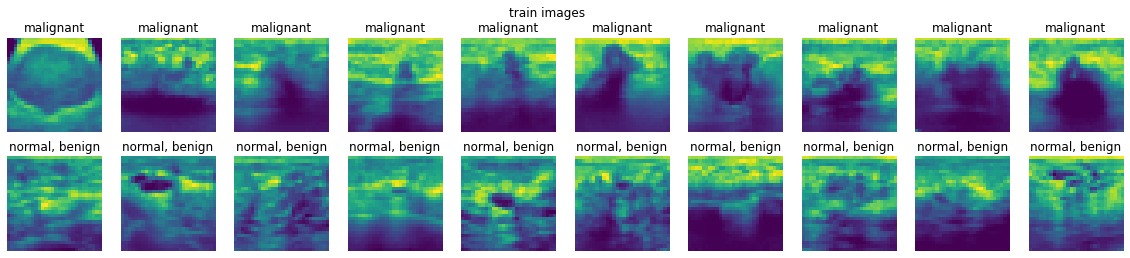

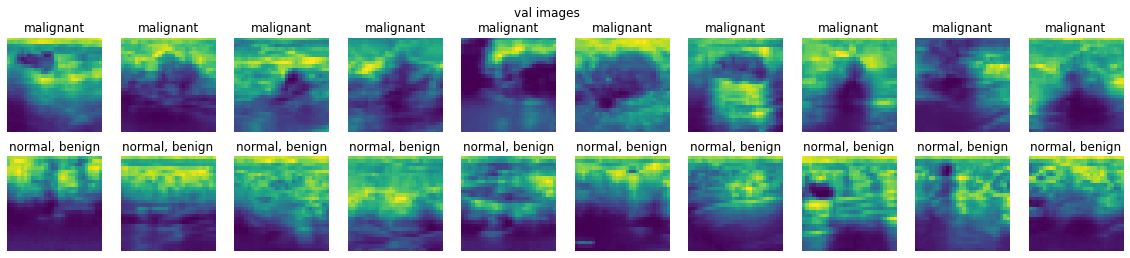

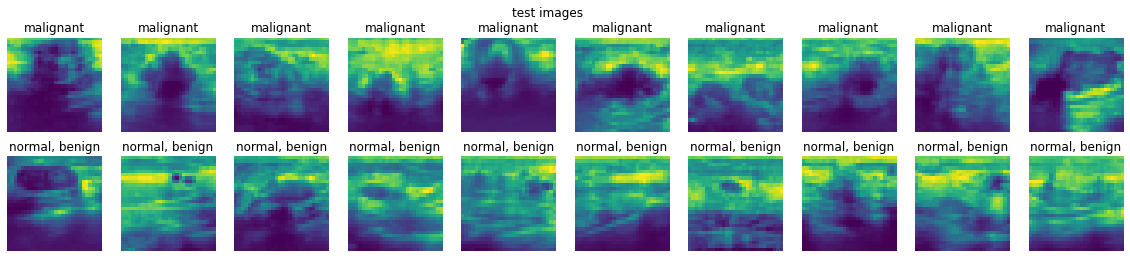

In [5]:
# define a function for easy plotting
# For visualizing data
import matplotlib.pyplot as plt

%matplotlib inline


def plot_images(dataset, num=10):
    """
    Plots num images from each of the 2 classes.
    """
    # get 10 class 0 images
    class0_imgs = dataset.imgs[dataset.labels[:, 0] == 0][:num]
    # get 10 class 1 images
    class1_imgs = dataset.imgs[dataset.labels[:, 0] == 1][:num]

    fig, axs = plt.subplots(2, num, figsize=(2 * num, 4))
    # add entire plot title
    plt.suptitle(dataset.split + " images")
    for i in range(num):
        axs[0, i].imshow(class0_imgs[i])
        axs[0, i].axis("off")
        # add each plot title
        axs[0, i].set_title(DS_INFO["label"]["0"])
        axs[1, i].imshow(class1_imgs[i])
        axs[1, i].axis("off")
        axs[1, i].set_title(DS_INFO["label"]["1"])
    plt.show()


plot_images(train_dataset)
plot_images(val_dataset)
plot_images(test_dataset)

**3.** Using the **PyTorch** *nn* module, train a single layer logistic regression model with the number of parameters as the input dimensionality of the data. Train on the training set on 20 epochs and evaluate the model on the validation set using accuracy as the evaluation metric. Draw separate graphs for the **validation loss and accuracy** of the model over each epoch.

What is the **accuracy** on the test set of the fully trained logisitc regression model? Are the validation results consistent with the test results?

In [6]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

Train Epoch: 1 	Loss: 0.670976

Validation set: Average loss: 0.6521, Accuracy: 56/78 (72%)

Train Epoch: 2 	Loss: 0.632688

Validation set: Average loss: 0.6065, Accuracy: 57/78 (73%)

Train Epoch: 3 	Loss: 0.608950

Validation set: Average loss: 0.5903, Accuracy: 57/78 (73%)

Train Epoch: 4 	Loss: 0.669858

Validation set: Average loss: 0.6454, Accuracy: 58/78 (74%)

Train Epoch: 5 	Loss: 0.610726

Validation set: Average loss: 0.5832, Accuracy: 58/78 (74%)

Train Epoch: 6 	Loss: 0.601793

Validation set: Average loss: 0.6061, Accuracy: 58/78 (74%)

Train Epoch: 7 	Loss: 0.624598

Validation set: Average loss: 0.5935, Accuracy: 58/78 (74%)

Train Epoch: 8 	Loss: 0.631692

Validation set: Average loss: 0.5471, Accuracy: 58/78 (74%)

Train Epoch: 9 	Loss: 0.578257

Validation set: Average loss: 0.5526, Accuracy: 58/78 (74%)

Train Epoch: 10 	Loss: 0.595873

Validation set: Average loss: 0.5657, Accuracy: 58/78 (74%)

Train Epoch: 11 	Loss: 0.575608

Validation set: Average loss: 0.5591

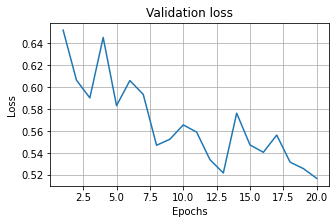

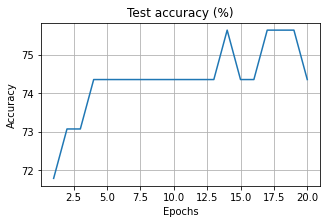

In [16]:
torch.manual_seed(SEED)
np.random.seed(SEED)

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")


# Create a logisticregression model with torch.nn.Module
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.loss_fun = nn.BCELoss()

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


input_size = 28 * 28
sig_model = LogisticRegression(input_size).to(device)
optimizer = torch.optim.SGD(sig_model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.BCELoss()


def train(model, epoch):
    model.train()  # Set model to training mode

    # Loop over each batch from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        # Copy data to GPU if needed
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()  # Zero gradient buffers
        output = model(data)  # Pass data through the network
        loss = criterion(output, target.to(torch.float32))  # Calculate loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        return print("Train Epoch: {} \tLoss: {:.6f}".format(epoch, loss.data.item()))


def test(model, loss_vector, accuracy_vector, eval_dataloader):
    model.eval()  # Set model to evaluation mode
    test_loss, total_val_correct, total_val_count = 0, 0, 0
    for data, target in eval_dataloader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        test_loss += criterion(output, target.to(torch.float32)).data.item()

        total_val_correct += torch.sum(torch.eq((output > 0.5).long(), target))
        total_val_count += len(target)

    test_loss /= len(eval_dataloader)
    loss_vector.append(test_loss)

    accuracy = 100.0 * total_val_correct.to(torch.float32) / len(eval_dataloader.dataset)
    accuracy_vector.append(accuracy)

    print(
        "\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss, total_val_correct, total_val_count, accuracy
        )
    )


epochs = 20

loss_test, acc_test = [], []
for epoch in range(1, epochs + 1):
    train(sig_model, epoch)
    test(sig_model, loss_test, acc_test, valid_loader)

if device == torch.device("cuda"):
    acc_test = [acc.cpu().numpy() for acc in acc_test]

plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation loss")
plt.plot(np.arange(1, epochs + 1), loss_test)
plt.grid()

plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test accuracy (%)")
plt.plot(np.arange(1, epochs + 1), acc_test)
plt.grid()


loss_test, acc_test = [], []
test(sig_model, loss_test, acc_test, test_loader)
print("The accuracy of the sigmoid model on the test set is: ", acc_test[-1].item(), "%")

**4.** Now, use the **multilayer neural network** model from [10.1.7.4](https://pykale.github.io/transparentML/10-deep-cnn-rnn/multilayer-nn.html#define-a-multilayer-neural-network) to train a model on the training set and evaluate the model on the validation set using accuracy as the evaluation metrics. Draw separate graphs for the **validation loss and accuracy** of the model over each epoch. Use the **sigmoid** function instead of the **log softmax** function for binary classification, and change the **output dimension** of the final layer accordingly.

What is the **accuracy** on the test set of the fully trained multilayer NN model? Are the validation results consistent with the test results? Is it better than the logistic regression model?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

Train Epoch: 1 	Loss: 0.712313

Validation set: Average loss: 0.7081, Accuracy: 21/78 (27%)

Train Epoch: 2 	Loss: 0.722050

Validation set: Average loss: 0.7122, Accuracy: 21/78 (27%)

Train Epoch: 3 	Loss: 0.709013

Validation set: Average loss: 0.7086, Accuracy: 21/78 (27%)

Train Epoch: 4 	Loss: 0.705685

Validation set: Average loss: 0.7004, Accuracy: 21/78 (27%)

Train Epoch: 5 	Loss: 0.699178

Validation set: Average loss: 0.6964, Accuracy: 21/78 (27%)

Train Epoch: 6 	Loss: 0.698865

Validation set: Average loss: 0.6965, Accuracy: 22/78 (28%)

Train Epoch: 7 	Loss: 0.706169

Validation set: Average loss: 0.6969, Accuracy: 34/78 (44%)

Train Epoch: 8 	Loss: 0.698550

Validation set: Average loss: 0.6933, Accuracy: 42/78 (54%)

Train Epoch: 9 	Loss: 0.696968

Validation set: Average loss: 0.6910, Accuracy: 48/78 (62%)

Train Epoch: 10 	Loss: 0.692922

Validation set: Average loss: 0.6889, Accuracy: 48/78 (62%)

Train Epoch: 11 	Loss: 0.686041

Validation set: Average loss: 0.6849

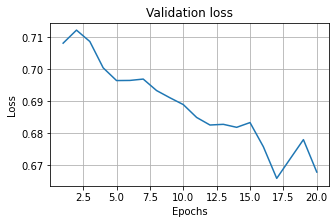

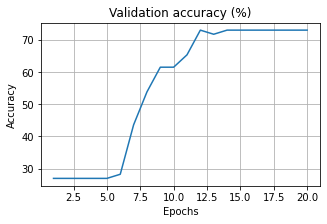

In [17]:
import torch.nn.functional as F

torch.manual_seed(SEED)
np.random.seed(SEED)


class MultilayerNN(nn.Module):
    def __init__(self):
        super(MultilayerNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 50)  # 28*28 = 784
        self.fc1_drop = nn.Dropout(0.2)  # Dropout layer with 0.2 drop probability
        self.fc2 = nn.Linear(50, 50)  # 50 inputs and 50 outputs (next hidden layer)
        self.fc2_drop = nn.Dropout(0.2)  # Dropout layer with 0.2 drop probability
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the data (n, 1, 28, 28) -> (n, 784)
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        x = self.fc3(x)
        return torch.sigmoid(x)


model_nn = MultilayerNN().to(device)
optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.01, momentum=0.5)
criterion = nn.BCELoss()


epochs = 20
loss_test, acc_test = [], []
for epoch in range(1, epochs + 1):
    train(model_nn, epoch)
    test(model_nn, loss_test, acc_test, valid_loader)


if device == torch.device("cuda"):
    acc_test = [acc.cpu().numpy() for acc in acc_test]

plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Validation loss")
plt.plot(np.arange(1, epochs + 1), loss_test)
plt.grid()

plt.figure(figsize=(5, 3))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation accuracy (%)")
plt.plot(np.arange(1, epochs + 1), acc_test)
plt.grid()

loss_test, acc_test = [], []
test(model_nn, loss_test, acc_test,  test_loader)
print("The accuracy of the multilayer NN model on the test set is: ", acc_test[-1].item(), "%")

